In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf, pacf
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
df = pd.read_csv("Super_Store.csv",sep=",", encoding='cp1252')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
3,6,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
4,11,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092


In [3]:
df.tail()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
2116,9963,CA-2015-168088,3/19/2015,3/22/2015,First Class,CM-12655,Corinna Mitchell,Home Office,United States,Houston,...,77041,Central,FUR-BO-10004218,Furniture,Bookcases,Bush Heritage Pine Collection 5-Shelf Bookcase...,383.4656,4,0.32,-67.6704
2117,9965,CA-2016-146374,12/5/2016,12/10/2016,Second Class,HE-14800,Harold Engle,Corporate,United States,Newark,...,19711,East,FUR-FU-10002671,Furniture,Furnishings,Electrix 20W Halogen Replacement Bulb for Zoom...,13.4000,1,0.00,6.4320
2118,9981,US-2015-151435,9/6/2015,9/9/2015,Second Class,SW-20455,Shaun Weien,Consumer,United States,Lafayette,...,70506,South,FUR-TA-10001039,Furniture,Tables,KI Adjustable-Height Table,85.9800,1,0.00,22.3548
2119,9990,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
2120,9991,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332


In [4]:
df.shape

(2121, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2121 entries, 0 to 2120
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         2121 non-null   int64  
 1   Order ID       2121 non-null   object 
 2   Order Date     2121 non-null   object 
 3   Ship Date      2121 non-null   object 
 4   Ship Mode      2121 non-null   object 
 5   Customer ID    2121 non-null   object 
 6   Customer Name  2121 non-null   object 
 7   Segment        2121 non-null   object 
 8   Country        2121 non-null   object 
 9   City           2121 non-null   object 
 10  State          2121 non-null   object 
 11  Postal Code    2121 non-null   int64  
 12  Region         2121 non-null   object 
 13  Product ID     2121 non-null   object 
 14  Category       2121 non-null   object 
 15  Sub-Category   2121 non-null   object 
 16  Product Name   2121 non-null   object 
 17  Sales          2121 non-null   float64
 18  Quantity

In [6]:
df.dtypes

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code        int64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object

In [7]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000
mean,5041.643564,55726.556341,349.834887,3.785007,0.173923,8.699327
std,2885.740258,32261.888225,503.179145,2.251620,0.181547,136.049246
min,1.000000,1040.000000,1.892000,1.000000,0.000000,-1862.312400
25%,2568.000000,22801.000000,47.040000,2.000000,0.000000,-12.849000
50%,5145.000000,60505.000000,182.220000,3.000000,0.200000,7.774800
75%,7534.000000,90032.000000,435.168000,5.000000,0.300000,33.726600
max,9991.000000,99301.000000,4416.174000,14.000000,0.700000,1013.127000


In [8]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [9]:
print('Start Date =',df['Order Date'].min())
print('End Date =',df['Order Date'].max())

Start Date = 2014-01-06 00:00:00
End Date = 2017-12-30 00:00:00


In [10]:
start_date = ' 2014-01-06'
end_date = '2017-12-30'

In [11]:
df=pd.DataFrame(df.groupby('Order Date')['Sales'].sum(),columns=['Sales'])

In [12]:
df

,Sales
Order Date,
2014-01-06,2573.8200
2014-01-07,76.7280
2014-01-10,51.9400
2014-01-11,9.9400
2014-01-13,879.9390
...,...
2017-12-24,1393.4940
2017-12-25,832.4540
2017-12-28,551.2568


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 889 entries, 2014-01-06 to 2017-12-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sales   889 non-null    float64
dtypes: float64(1)
memory usage: 13.9 KB


In [14]:
df = df.reset_index()
df

,Order Date,Sales
0,2014-01-06,2573.8200
1,2014-01-07,76.7280
2,2014-01-10,51.9400
3,2014-01-11,9.9400
4,2014-01-13,879.9390
...,...,...
884,2017-12-24,1393.4940
885,2017-12-25,832.4540
886,2017-12-28,551.2568
887,2017-12-29,2330.7180


In [15]:
df = df.set_index('Order Date')

In [16]:
df

,Sales
Order Date,
2014-01-06,2573.8200
2014-01-07,76.7280
2014-01-10,51.9400
2014-01-11,9.9400
2014-01-13,879.9390
...,...
2017-12-24,1393.4940
2017-12-25,832.4540
2017-12-28,551.2568


In [17]:
y =pd.DataFrame(df['Sales'].resample('MS').mean())
y.head()

,Sales
Order Date,
2014-01-01,480.194231
2014-02-01,367.931600
2014-03-01,857.291529
2014-04-01,567.488357
2014-05-01,432.049188


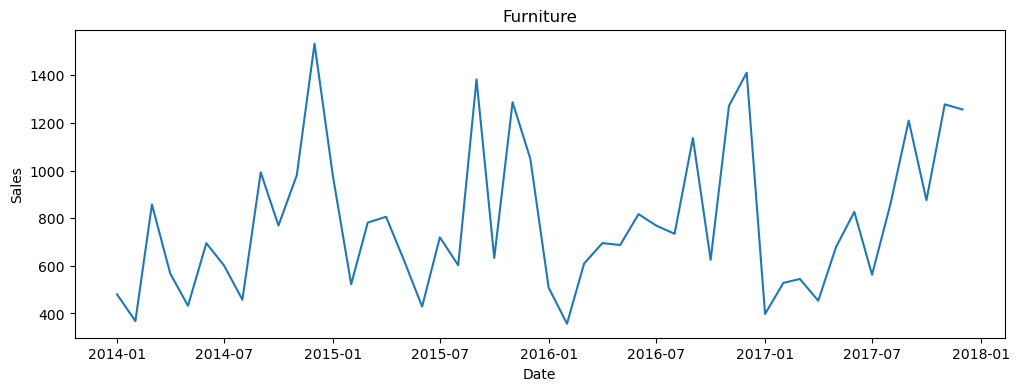

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.plot(y['Sales'])
plt.title('Furniture')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

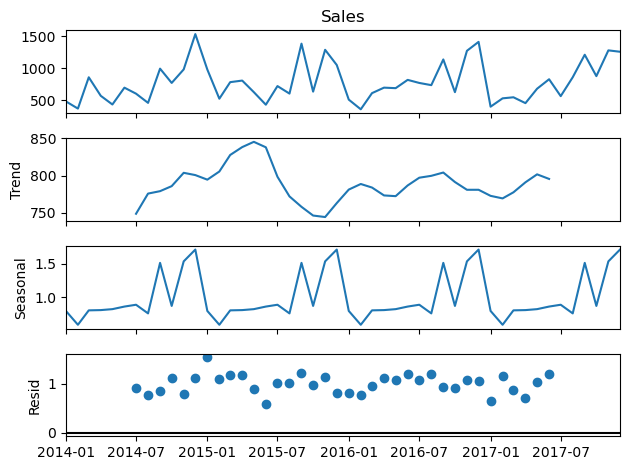

In [19]:
decomposition = sm.tsa.seasonal_decompose(y['Sales'], model='multiplicative')
fig = decomposition.plot()
plt.show()

In [20]:
y['rollMean'] = y.Sales.rolling(window = 12).mean()
y['rollstd'] = y.Sales.rolling(window = 12).std()

In [21]:
y.head()

,Sales,rollMean,rollstd
Order Date,,,
2014-01-01,480.194231,NaN,NaN
2014-02-01,367.931600,NaN,NaN
2014-03-01,857.291529,NaN,NaN
2014-04-01,567.488357,NaN,NaN
2014-05-01,432.049188,NaN,NaN


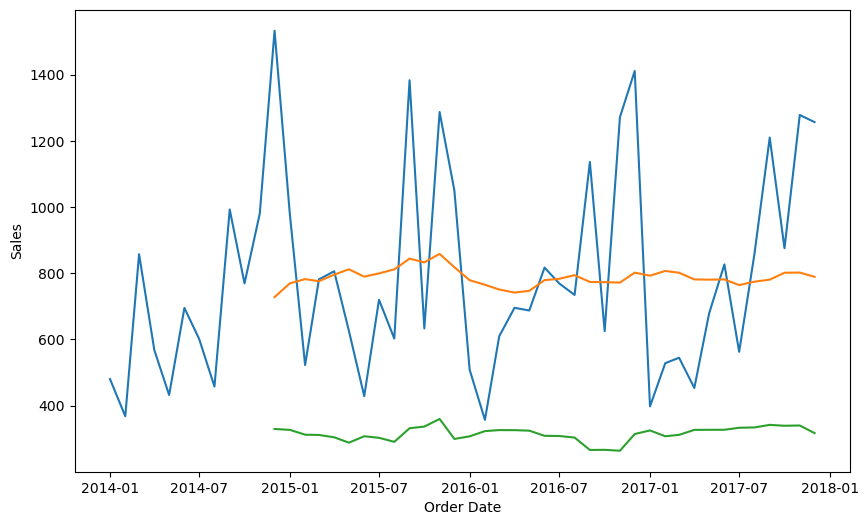

In [22]:
plt.figure(figsize=(10,6))
sns.lineplot(data= y, x = y.index,y = y['Sales'])
sns.lineplot(data= y, x = y.index,y = y['rollMean'])
sns.lineplot(data= y, x = y.index,y = y['rollstd'])
plt.show()

In [23]:
from statsmodels.tsa.stattools import adfuller

In [24]:
adfTest  = adfuller(y['Sales'])
adfTest

(-5.191070187339275,
 9.1687566556655e-06,
 10,
 37,
 {'1%': -3.6209175221605827,
  '5%': -2.9435394610388332,
  '10%': -2.6104002410518627},
 521.9616303121272)

In [25]:
stats = pd.Series(adfTest[0:4],index = ['Test Statistic','p-value','No.lags used','number of observations used'])
stats 

Test Statistic                 -5.191070
p-value                         0.000009
No.lags used                   10.000000
number of observations used    37.000000
dtype: float64

In [26]:
for i,j in adfTest[4].items():
    print('criticality',i,':',j)

criticality 1% : -3.6209175221605827
criticality 5% : -2.9435394610388332
criticality 10% : -2.6104002410518627


In [27]:
from statsmodels.tsa.stattools import adfuller

# Perform the ADF Test
ADF_result = adfuller(y['Sales'])

# Extract and print the p-value
p_value = ADF_result[1]

print(f'p-value: {p_value}')

# Interpret the results
if p_value <= 0.05:
    print("Null hypothesis rejected. The data is stationary.")
else:
    print("Null hypothesis not rejected. The data is not stationary.")

p-value: 9.1687566556655e-06
Null hypothesis rejected. The data is stationary.


<Figure size 1200x600 with 0 Axes>

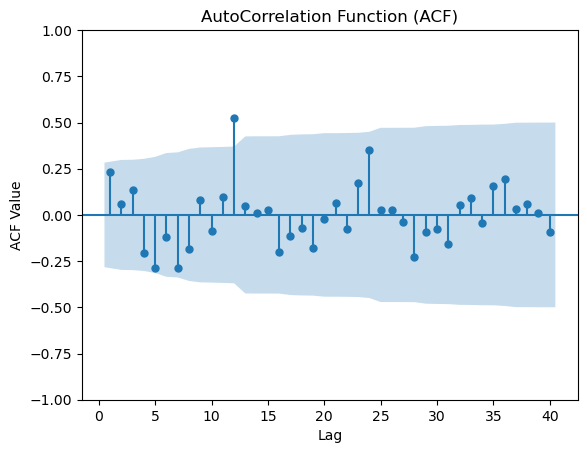

In [28]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(12, 6))
plot_acf(y['Sales'], lags = 40,zero = False)  # You can adjust the number of lags to display
plt.title('AutoCorrelation Function (ACF)')
plt.xlabel('Lag')
plt.ylabel('ACF Value')
plt.show()

<Figure size 1200x600 with 0 Axes>

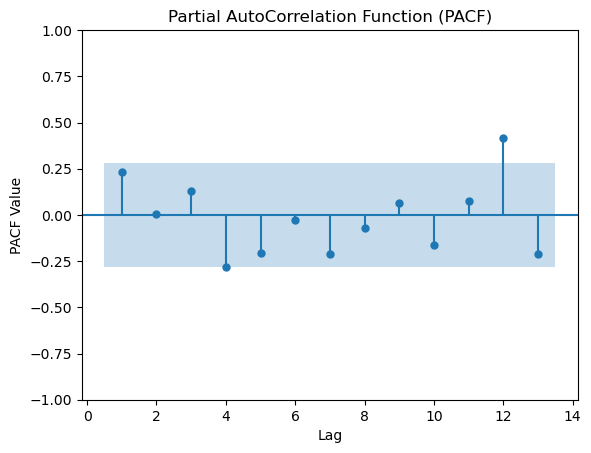

In [29]:
# Plot the PACF (Partial AutoCorrelation Function)
plt.figure(figsize=(12, 6))
plot_pacf(y['Sales'], lags=13,zero=False)  # You can adjust the number of lags to display
plt.title('Partial AutoCorrelation Function (PACF)')
plt.xlabel('Lag')
plt.ylabel('PACF Value')
plt.show()


In [30]:
y.shape

(48, 3)

In [31]:
round(y.shape[0]*.8)

38

In [32]:
train = y.iloc[:40]
test = y.iloc[40:]

In [33]:
print(train.shape,test.shape)

(40, 3) (8, 3)


In [34]:
print(train.shape,test.shape)

(40, 3) (8, 3)


In [35]:
pip install pmdarima

Note: you may need to restart the kernel to use updated packages.


In [36]:
# Perform AutoARIMA
import pandas as pd
from pmdarima import auto_arima

model = auto_arima(train['Sales'], seasonal=True, m=12) 

In [37]:
# Summary of the best model
print(model.summary())

                                SARIMAX Results                                 
Dep. Variable:                        y   No. Observations:                   40
Model:             SARIMAX(1, 1, 0, 12)   Log Likelihood                -191.616
Date:                  Thu, 15 Feb 2024   AIC                            387.233
Time:                          13:46:37   BIC                            389.897
Sample:                      01-01-2014   HQIC                           388.048
                           - 04-01-2017                                         
Covariance Type:                    opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.5183      0.166     -3.120      0.002      -0.844      -0.193
sigma2      4.456e+04    1.6e+04      2.785      0.005    1.32e+04    7.59e+04
Ljung-Box (L1) (Q):                 

In [38]:
test.shape

(8, 3)

In [39]:
# Make forecast
test['prediction_AA'] = model.predict(n_periods=6)  # Forecast the next 6 periods
test

,Sales,rollMean,rollstd,prediction_AA
Order Date,,,,
2017-05-01,678.302328,780.408346,326.923303,654.989021
2017-06-01,826.460291,781.204141,327.031839,615.616261
2017-07-01,562.524857,764.019845,333.107906,743.322201
2017-08-01,857.881889,774.317687,334.014749,665.941061
2017-09-01,1209.508583,780.447288,341.837849,1263.898777
2017-10-01,875.362728,801.321476,339.111258,629.075016
2017-11-01,1277.817759,801.860860,339.930990,NaN
2017-12-01,1256.298672,788.992432,316.931482,NaN


<Axes: xlabel='Order Date', ylabel='Sales'>

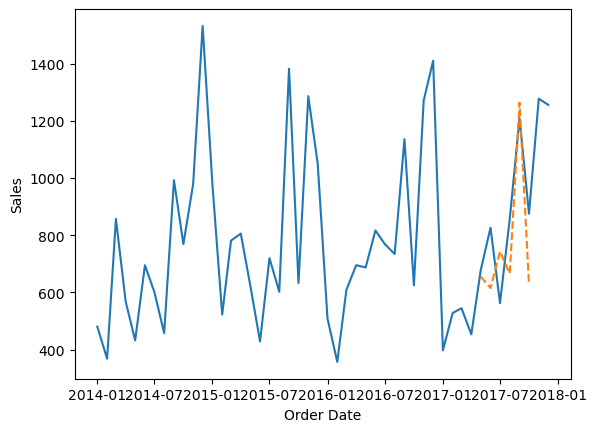

In [40]:
sns.lineplot(data = y, x = y.index, y = y['Sales'])
sns.lineplot(data = test, x = test.index, y = test['prediction_AA'], linestyle='--')

In [41]:
from statsmodels.tsa.arima.model import ARIMA

# Replace the old ARIMA class with the new ARIMA implementation
model = ARIMA(train['Sales'], order=(1, 0, 1))
model = model.fit()

In [42]:
prediction = model.predict(start = test.index[0],end = test.index[-1])

In [43]:
test['prediction_ARMA'] = prediction

<Axes: xlabel='Order Date', ylabel='Sales'>

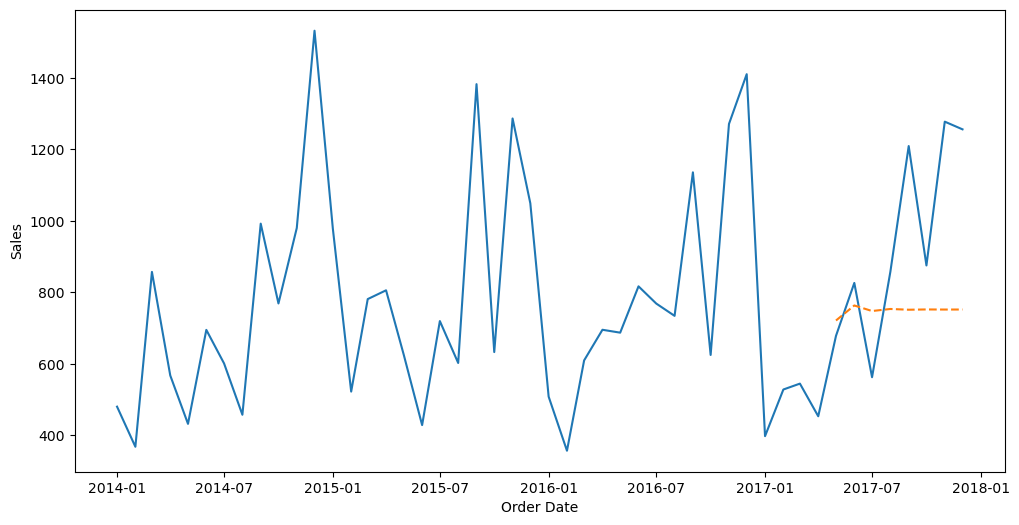

In [45]:
plt.figure(figsize=(12,6))
sns.lineplot(data = y, x = y.index, y = y['Sales'])
sns.lineplot(data = test, x = test.index, y = test['prediction_ARMA'], linestyle='--')

In [46]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import r2_score


mse = mean_squared_error(test['Sales'], test['prediction_ARMA'])

# Calculate RMSE
rmse = np.sqrt(mse)

# Calculate R2_Score
r2_score = r2_score(test['Sales'], test['prediction_ARMA'])

print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f'r2_score: {r2_score}')

MSE: 100851.51880901305
RMSE: 317.57128146136426
r2_score: -0.547059289473337


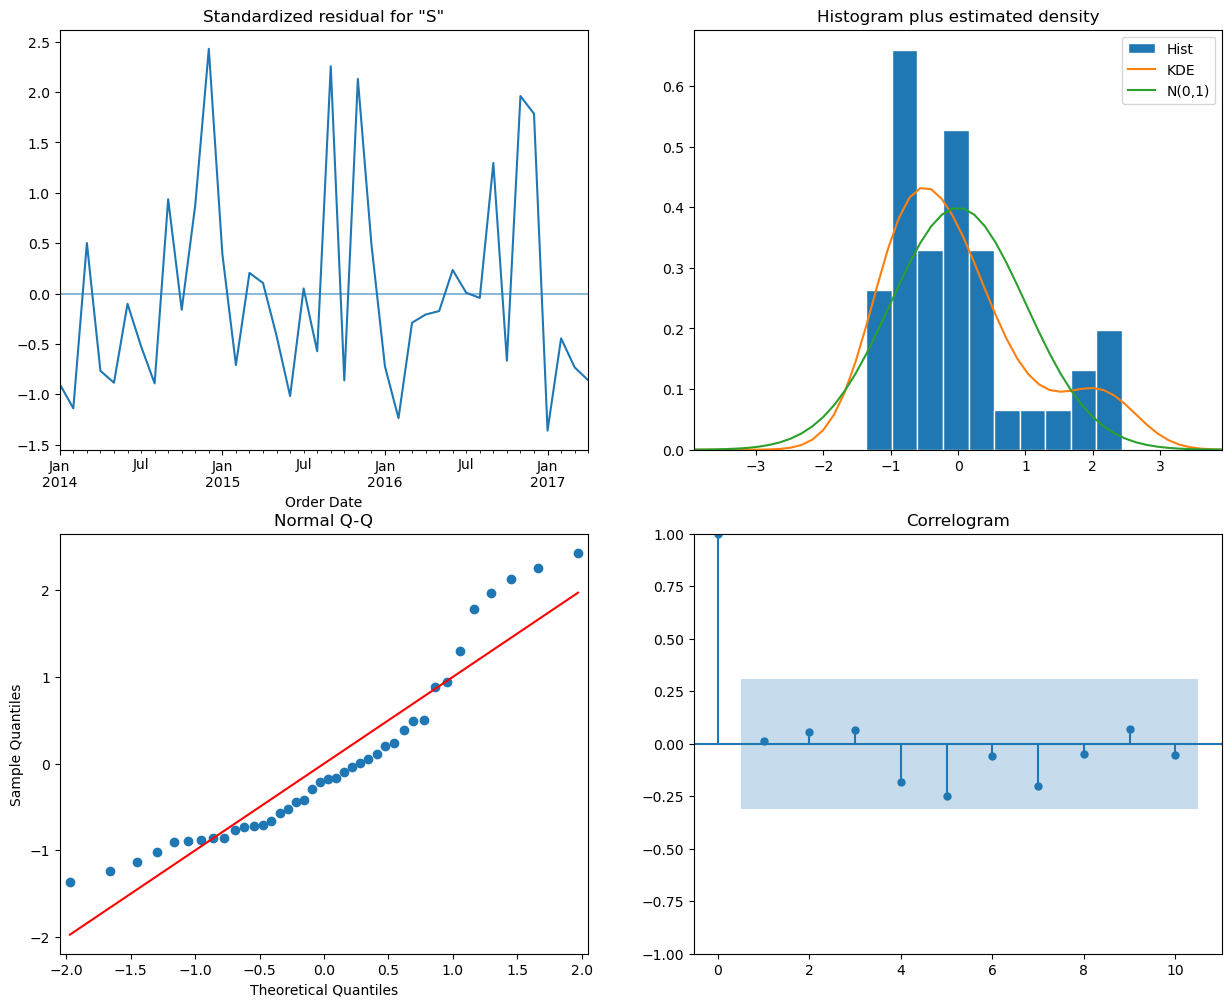

In [47]:
model.plot_diagnostics(figsize = (15,12))
plt.show()

In [48]:
order = (1, 0, 1)  # AR(4) model  the model takes (AR,I,MA)--> (p,d,q)
model = sm.tsa.ARIMA(train['Sales'], order=order)
results = model.fit()

# Print the model summary
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   40
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -284.480
Date:                Thu, 15 Feb 2024   AIC                            576.960
Time:                        13:51:17   BIC                            583.715
Sample:                    01-01-2014   HQIC                           579.402
                         - 04-01-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        752.0300     74.012     10.161      0.000     606.970     897.090
ar.L1         -0.3690      0.708     -0.521      0.602      -1.757       1.019
ma.L1          0.5520      0.600      0.920      0.3